In [113]:
import pandas as pd
import numpy as np
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [114]:
# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CPN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CPN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [115]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [116]:
# Load the dataset
data = pd.read_excel('./project_dataset.xlsx')

In [117]:
data.head()

,Text,Sentiments
0,nice hotel expensive parking got good deal sta...,positive
1,ok nothing special charge diamond member hilto...,negative
2,nice rooms not positive* experience hotel mona...,negative
3,"unique, great stay, wonderful time hotel monac...",positive
4,"great stay great stay, went seahawk game aweso...",positive


In [118]:
print(data.describe())

                                                     Text Sentiments
count                                               20491      20491
unique                                              20491          2
top     nice hotel expensive parking got good deal sta...   positive
freq                                                    1      15093


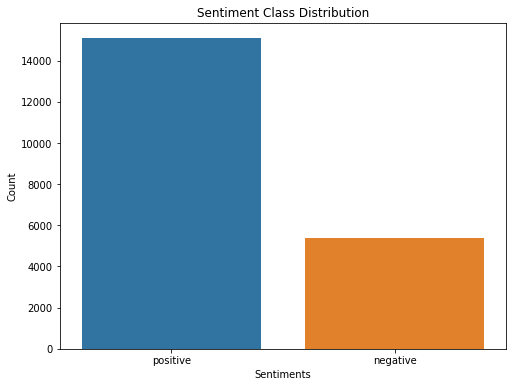

In [119]:
# Visualize the sentiment class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sentiments')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

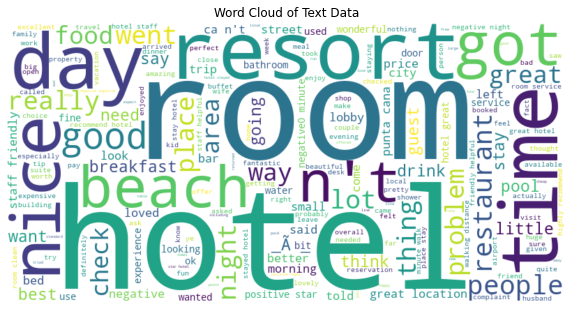

In [120]:
# Word cloud of the text data
from wordcloud import WordCloud

# Concatenate all the text data into a single string
text_data = ' '.join(data['Text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [121]:
# Preprocess the data
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


In [122]:
# Apply preprocessing to the 'Text' column
data['Text'] = data['Text'].apply(preprocess_text)

In [123]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['Text'], data['Sentiments'], test_size=0.2, random_state=42)

In [124]:
# Create a TF-IDF vectorizer and transform the training data
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)

In [125]:
# Transform the testing data
test_vectors = vectorizer.transform(test_data)

In [126]:
# Create a Random Forest classifier
classifier = RandomForestClassifier()

In [127]:
# Train the classifier
classifier.fit(train_vectors, train_labels)

RandomForestClassifier()

In [101]:
# Make predictions on the testing data
predictions = classifier.predict(test_vectors)

In [102]:
# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8424005855086607


In [103]:
# Save the trained model using joblib
joblib.dump(classifier, 'sentiment_model.pkl')

['sentiment_model.pkl']